In [14]:
%pip install pydot
%pip install graphviz

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 3.1 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

In [4]:
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu')) 
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [8]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20


2022-11-16 16:48:11.051399: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1500/1500 [==============================] - 14s 9ms/step - loss: 0.5438 - accuracy: 0.8062 - val_loss: 0.3471 - val_accuracy: 0.8722
Epoch 2/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3580 - accuracy: 0.8740 - val_loss: 0.2863 - val_accuracy: 0.8923
Epoch 3/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3055 - accuracy: 0.8906 - val_loss: 0.2602 - val_accuracy: 0.9022
Epoch 4/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2732 - accuracy: 0.9025 - val_loss: 0.2464 - val_accuracy: 0.9072
Epoch 5/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2524 - accuracy: 0.9082 - val_loss: 0.2371 - val_accuracy: 0.9114
Epoch 6/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2297 - accuracy: 0.9167 - val_loss: 0.2341 - val_accuracy: 0.9135
Epoch 7/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2132 - accuracy: 0.9218 - val_loss: 0.2243 - val_accuracy:

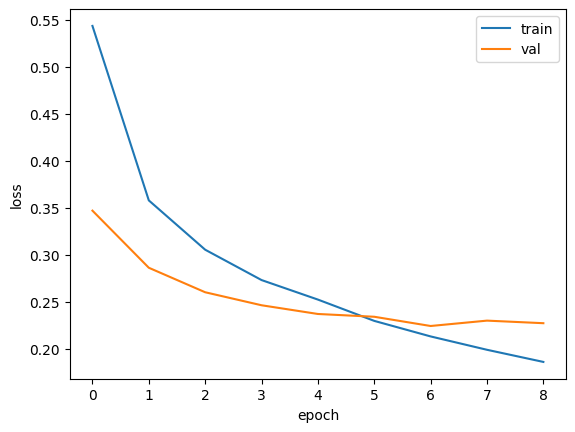

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val']) 
plt.show()

In [11]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2243 - accuracy: 0.9172


[0.22427965700626373, 0.9171666502952576]

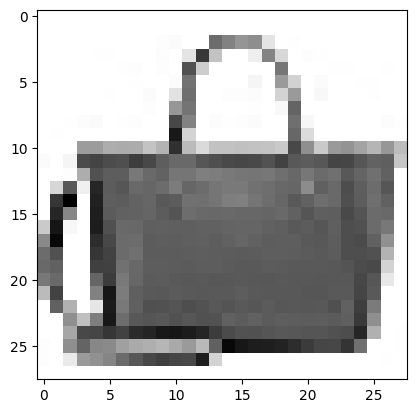

In [12]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [13]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 66ms/step
[[1.4085693e-16 1.9272790e-22 1.1292038e-16 2.4315971e-18 3.8484373e-16
  1.1255570e-16 1.4440934e-14 9.4185354e-15 1.0000000e+00 9.6545404e-17]]


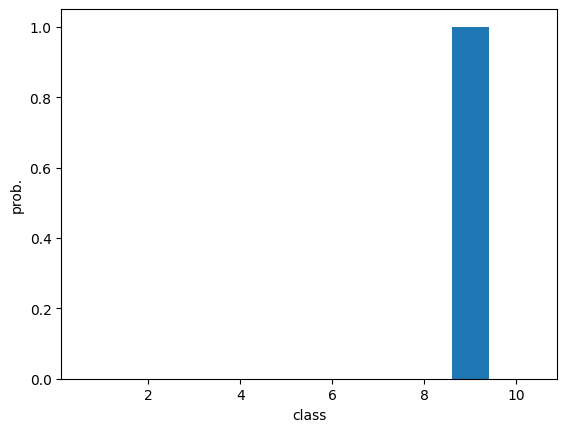

In [14]:
plt.bar(range (1, 11), preds[0]) 
plt.xlabel('class')
plt.ylabel('prob.') 
plt.show()

In [17]:
classes=['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [20]:
import numpy as np

print(classes[np.argmax(preds)])

가방


In [21]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2446 - accuracy: 0.9136


[0.244574174284935, 0.9136000275611877]